In [85]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import time
from collections import defaultdict as ddict

In [121]:
data = pd.read_csv('clean_merged_mta_data.csv')
data.rename(index=str, columns={"sum_ent_ext": "Traffic"}, inplace = True)
# data.head()
data.STATION.unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

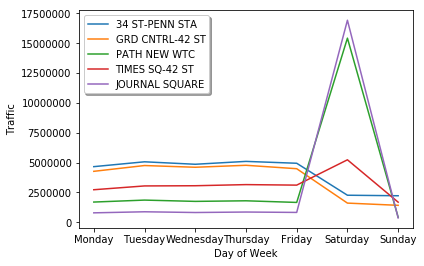

In [119]:
# by_station = data.groupby(['STATION', 'day_of_week']).mean().sort_values(by=['Traffic'],ascending=False)
# by_station.head(10)

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

by_station = data.groupby(['STATION', 'day_of_week']).sum()
penn = by_station.loc['34 ST-PENN STA'].reindex(ordered_days)
gct = by_station.loc['GRD CNTRL-42 ST'].reindex(ordered_days)
wtc = by_station.loc['PATH NEW WTC'].reindex(ordered_days)
tsq = by_station.loc['TIMES SQ-42 ST'].reindex(ordered_days)
jsq = by_station.loc['JOURNAL SQUARE'].reindex(ordered_days)
fulton = by_station.loc['FULTON ST'].reindex(ordered_days)
herald = by_station.loc['34 ST-HERALD SQ'].reindex(ordered_days)
grove = by_station.loc['GROVE STREET'].reindex(ordered_days)
union = by_station.loc['14 ST-UNION SQ'].reindex(ordered_days)

# penn.plot(y='Traffic')
# gct.plot(y='Traffic')

plt.plot(penn.loc[:, 'Traffic'])
plt.plot(gct.loc[:, 'Traffic'])
plt.plot(wtc.loc[:, 'Traffic'])
plt.plot(tsq.loc[:, 'Traffic'])
plt.plot(jsq.loc[:, 'Traffic'])
# plt.plot(fulton.loc[:, 'Traffic'])
# plt.plot(herald.loc[:, 'Traffic'])
# plt.plot(grove.loc[:, 'Traffic'])
# plt.plot(union.loc[:, 'Traffic'])
# plt.plot(canal.loc[:, 'Traffic'])

plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','PATH NEW WTC','TIMES SQ-42 ST','JOURNAL SQUARE'],
           shadow = True, loc = 0);
# plt.legend(['FULTON ST','34 ST-HERALD SQ','GROVE STREET','14 ST-UNION SQ','CANAL ST'],
#            shadow = True, loc = 0);
plt.xlabel('Day of Week')
plt.ylabel('Traffic')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

In [120]:
by_station.loc['34 ST-PENN STA'].reindex(ordered_days)

,ENTRIES,EXITS,month,Ent,Ext,Traffic
day_of_week,,,,,,
Monday,384406846992,284615927083,38746,2584411.0,2078011.0,4662422.0
Tuesday,382577986292,283557459386,39386,2758242.0,2310254.0,5068496.0
Wednesday,378566660808,280813109464,39241,2635622.0,2226341.0,4861963.0
Thursday,380425649970,282135022494,39919,2763027.0,2339823.0,5102850.0
Friday,386134695998,285933321819,40708,2607355.0,2338879.0,4946234.0
Saturday,315820846181,233427788634,31638,1150893.0,1118125.0,2269018.0
Sunday,380511337586,281537065005,38495,1180930.0,1044692.0,2225622.0


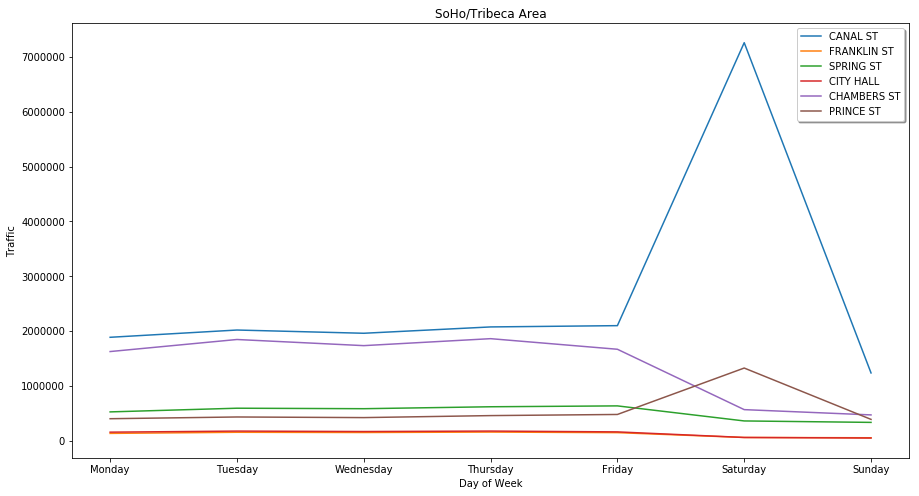

In [140]:
# SoHo - Tribecca
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig = plt.figure(figsize = (15,8))

canal = by_station.loc['CANAL ST'].reindex(ordered_days)
franklin = by_station.loc['FRANKLIN ST'].reindex(ordered_days)
spring = by_station.loc['SPRING ST'].reindex(ordered_days)
city_hall = by_station.loc['CITY HALL'].reindex(ordered_days)
chambers = by_station.loc['CHAMBERS ST'].reindex(ordered_days)
prince = by_station.loc['PRINCE ST'].reindex(ordered_days)

plt.plot(canal.loc[:, 'Traffic'])
plt.plot(franklin.loc[:, 'Traffic'])
plt.plot(spring.loc[:, 'Traffic'])
plt.plot(city_hall.loc[:, 'Traffic'])
plt.plot(chambers.loc[:, 'Traffic'])
plt.plot(prince.loc[:, 'Traffic'])

plt.legend(['CANAL ST','FRANKLIN ST','SPRING ST','CITY HALL','CHAMBERS ST', 'PRINCE ST'],
           shadow = True, loc = 0);
plt.title('SoHo/Tribeca Area')
plt.xlabel('Day of Week')
plt.ylabel('Traffic')
plt.ticklabel_format(axis='y', style='sci')
plt.savefig('soho_tribecca', bbox_inches = 'tight')
plt.show()


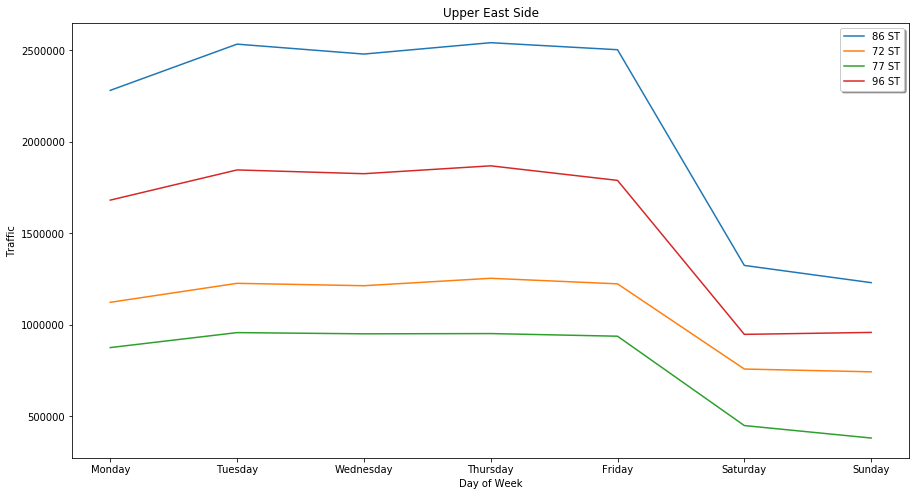

In [139]:
# Upper East Side
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig = plt.figure(figsize = (15,8))

st86 = by_station.loc['86 ST'].reindex(ordered_days)
st72 = by_station.loc['72 ST'].reindex(ordered_days)
st77 = by_station.loc['77 ST'].reindex(ordered_days)
st96 = by_station.loc['96 ST'].reindex(ordered_days)

plt.plot(st86.loc[:, 'Traffic'])
plt.plot(st72.loc[:, 'Traffic'])
plt.plot(st77.loc[:, 'Traffic'])
plt.plot(st96.loc[:, 'Traffic'])

plt.legend(['86 ST','72 ST','77 ST','96 ST'],
           shadow = True, loc = 0);
plt.title('Upper East Side')
plt.xlabel('Day of Week')
plt.ylabel('Traffic')
plt.ticklabel_format(axis='y', style='sci')
plt.savefig('upper_east', bbox_inches = 'tight')
plt.show()

In [ ]:
# Midtown East